<a href="https://colab.research.google.com/github/Da-Seungheon/Data-Analysis-EDA/blob/main/01_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 변수명 바꾸기

- 데이터를 변형할 때는 복사본을 만들어서 진행하는 습관을 가지자

In [ ]:
# 복사본
df1 = df.copy()
df1

,이름,나이
0,승헌,31
1,성연,28
2,제종,50


In [ ]:
data_path = '/content/mpg.csv'
df = pd.read_csv(data_path)
df.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [ ]:
df = df.rename(columns={
    'cty' : 'city',
    'hwy' : 'highway'
})

# 파생변수 만들기

- 변수를 조합하거나, 함수를 이용해서 파생변수를 만드는 경우도 있음

- 도로 유형을 통틀어 어떤 자동차 모델의 변비가 높은지 분석할 수 없어
- 종합해서 분석하려면 하나로 통합된 연비 변수가 필요
- 도로 유형을 통합한 연비 변수를 만들어보자

In [ ]:
df.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


In [ ]:
df['total'] = (df['city'] + df['highway']) / 2
df.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


In [ ]:
# 통합연비의 평균을 구해보자
# 평균을 기준으로 어느 차량이 연비가 높은지 비교해 볼 수 있음
df['total'].mean()

20.14957264957265

## 조건문을 활용해서 파생변수를 만들어보자

- 가정
    - 전체 자동차 중에서 연비 기준을 충족해 '고연비 합격 판정'을 받은 자동차가 몇 대나 되는지 알아보자
    - 연비가 기준값을 넘으변 합격, 넘지 못하면 불합격을 부여
- 순서
    - 기준 값 정하기
        - 연비의 total 값의 평균과 중앙값을 확인
        - 히스토그램으로 어느 연비에 많이 분포 되어 있는지 확인
    - 판정 합격 변수 만들기
    - 빈도표로 합격 판정 자동차 수 살펴보기
    - 막대 그래프로 빈도 표현하기

### 기준 값 정하기

In [ ]:
# 평균과 중앙값은 약 20
df['total'].describe()

,total
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


<Axes: ylabel='Frequency'>

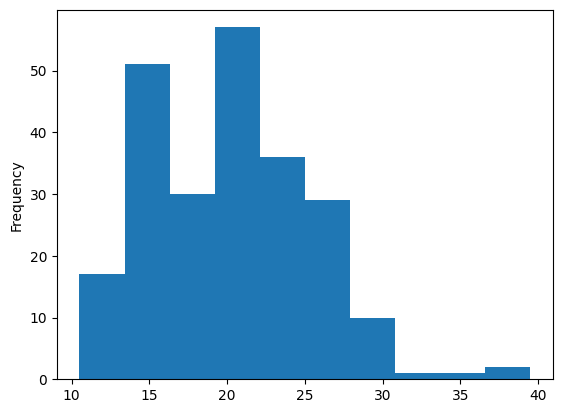

In [ ]:
# 분포는 20~23 사이에 많이 분포
df['total'].plot.hist()

- 합격기준을 20으로 설정
    - 20 이상이면 합격
    - 20 이하이면 불합격

### 합격 판정 변수 만들기

- np.where : 지정한 조건에 맞을 때와 맞지 않을 때, 소로 다른 값을 반환하는 기능
- np.where(조건, 조건에 맞을 때 부여, 조건에 맞지 않을 때 부여)

In [ ]:
df['test'] = np.where(df['total'] >= 20, 'pass', 'fail')
df.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass


In [ ]:
# 합격한 자동차와 불합격한 자동차가 각각 몇대인지 알아보자
df['test'].value_counts()

,count
test,
pass,128
fail,106


<Axes: xlabel='test'>

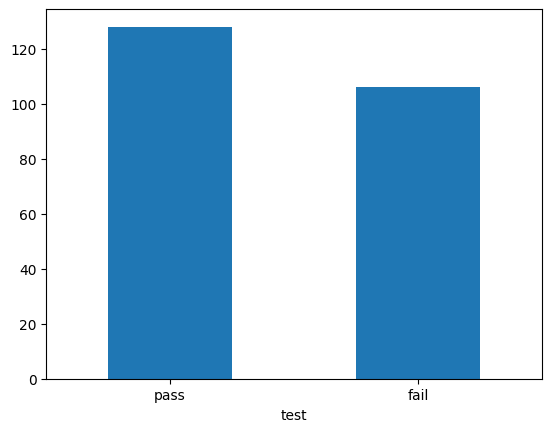

In [ ]:
# 위 지표를 변수에 할당하고 막대그래프 출력
test_result = df['test'].value_counts()

test_result.plot.bar(rot=0)  #rot=0 축 이름 회전

### 연비 등급 변수 만들기

- A : 30 이상
- B : 20 ~ 29
- C : 20 미만

- 1. 연비 등급 변수 만들기

In [ ]:
df['grade'] = np.where(df['total'] >= 30, 'A',
              np.where(df['total'] >= 20, 'B' , 'C'))

df

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,B
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,B
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,B
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass,B


<Axes: xlabel='grade'>

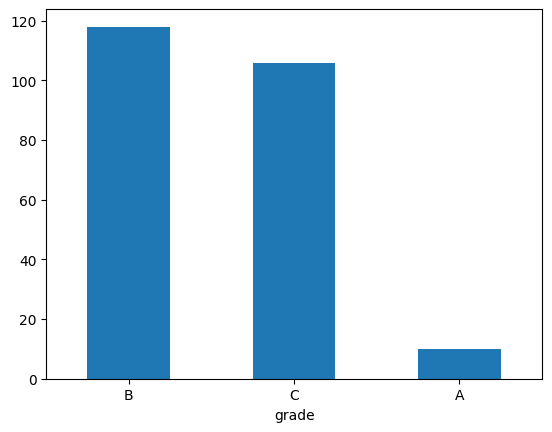

In [ ]:
grade_result = df['grade'].value_counts()
grade_result.plot.bar(rot=0)

In [ ]:
# 알파벳 순으로 정렬하기
reuslt2 = df['grade'].value_counts().sort_index()
reuslt2

,count
grade,
A,10
B,118
C,106


<Axes: xlabel='grade'>

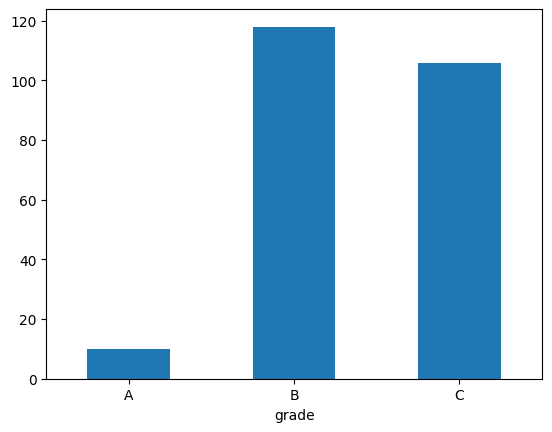

In [ ]:
reuslt2.plot.bar(rot=0)

In [ ]:
copy_df = df.copy()

In [ ]:
copy_df['new'] = np.where(df['total'] >= 60, '60대 이상',
                 np.where(df['total'] >= 30, '30대 이상',
                 np.where(df['total'] >= 20, '20대 이상', '20대 미만')))

In [ ]:
copy_df

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,test,grade,new
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,20대 이상
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,20대 이상
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,20대 이상
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,20대 이상
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,20대 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,B,20대 이상
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,B,20대 이상
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,B,20대 이상
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass,B,20대 이상


In [ ]:
copy_df[copy_df['new'] == '30대 이상']

In [ ]:
copy_df['new'].unique()

array(['20대 이상', '20대 미만', '30대 이상'], dtype=object)

In [ ]:
df.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B


In [ ]:
# 카테고리 컬럼에서 컴팩이면서 서브컴팩이면서 2시터이면 사이즈가  small, 그렇지 않으면 large
df['size'] = np.where(df['category'].isin(['compat', 'sbucompact','2seater']), 'small', 'large')
df

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,test,grade,size
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,large
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,large
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,large
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,large
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,B,large
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,B,large
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,B,large
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass,B,large


# 분석 도전

- 문제
    - 1. 데이터의 특징을 파악
    - 2. poptotal(전체 인구) 변수를 total로, popasian(아시아 인구) 변수를 asian으로 변경
    - 3. total, asian 변수를 이용해 전체 인구 대비 아시아 인구 백분율 파생벽수를 추가하고 히스토그램으로 분포를 확인
    - 4. 아시아 인구 백분율 전체 평균을 구하고, 평균을 초과하면 large, 그 외에는 small를 부여한 파생변수를 생성
    - 5. large와 small에 해당하는 지역이 얼마나 많은지 빈도표와 빈도 막대 그래프를 만들어 확인하자

In [ ]:
data_path = '/content/midwest.csv'
df = pd.read_csv(data_path)
df.head(3)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR


### 2. 변수 이름 변경

In [ ]:
df = df.rename(columns={
    'poptotal' : 'total',
    'popasian' : 'asian'
})

df.head(2)

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.96154,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.00000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR


### 3. 인구 대비 아시아 인구의 백분율 파생변수를 추가하고 히스토그램으로 분포를 확인

<Axes: ylabel='Frequency'>

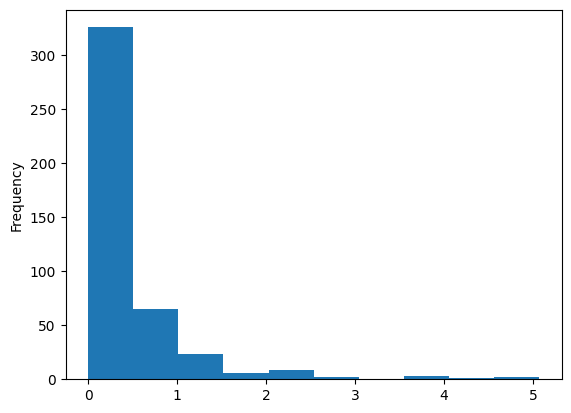

In [ ]:
ratio = (df['asian'] / df['total']) * 100
ratio.plot.hist()

In [ ]:
df['ratio'] = (df['asian'] / df['total']) * 100
df.head(2)

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,asian_size
0,561,ADAMS,IL,0.052,66090,1270.96154,63917,1702,98,249,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small
1,562,ALEXANDER,IL,0.014,10626,759.00000,7054,3496,19,48,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small


### 4. 아시아 인구 백분율 전체 평균을 구하고, 평균을 초과하면 large, 그렇지 않으면 small을 부여한 파생변수 생성

In [ ]:
ratio_result = round(ratio.mean(),5)

In [ ]:
round(ratio.mean(),5)

0.48725

In [ ]:
df['asian_size'] = np.where(df['ratio'] > ratio_result, 'large', 'small')
df.head()

<ipython-input-85-0ae0cec604d6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['asian_size'] = np.where(df['ratio'] > ratio_result, 'large', 'small')


,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,asian_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,0.214604,0.658667,0.239617,0.353516,0.885746,0.199549,0.221821,1.231471,0.980912,small


<Axes: xlabel='asian_size'>

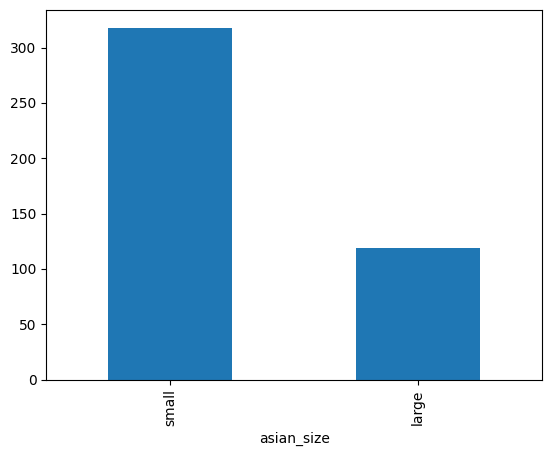

In [ ]:
size_num = df['asian_size'].value_counts()
size_num.plot.bar()